# Sms spam detection

In [20]:
pip install nltk

  Using cached nltk-3.8.1-py3-none-any.whl.metadata (2.8 kB)
  Using cached click-8.1.7-py3-none-any.whl.metadata (3.0 kB)
  Using cached regex-2024.5.15-cp312-cp312-win_amd64.whl.metadata (41 kB)
  Using cached tqdm-4.66.4-py3-none-any.whl.metadata (57 kB)
Using cached nltk-3.8.1-py3-none-any.whl (1.5 MB)
Using cached regex-2024.5.15-cp312-cp312-win_amd64.whl (268 kB)
Using cached click-8.1.7-py3-none-any.whl (97 kB)
Using cached tqdm-4.66.4-py3-none-any.whl (78 kB)
Note: you may need to restart the kernel to use updated packages.


In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
import nltk
nltk.download('punkt')
from nltk.corpus import stopwords
nltk.download('stopwords')
import string
from nltk.stem.porter import PorterStemmer
#models
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
#model evaluation
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report
from sklearn.metrics import precision_score,recall_score,f1_score,confusion_matrix

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\dell\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Import data

In [4]:
df=pd.read_csv("spam.csv",encoding='latin1')
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [5]:
# drop last 3 cols
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [6]:
df.head(5)

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
# renaming the cols
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.head(5)

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
encoder = LabelEncoder()

In [10]:
df['target'] = encoder.fit_transform(df['target'])

In [11]:
df.head(3)

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...


In [12]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [13]:
df.duplicated().sum()

403

In [14]:
# remove duplicates
df = df.drop_duplicates(keep='first')

In [15]:
df.duplicated().sum()

0

In [16]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

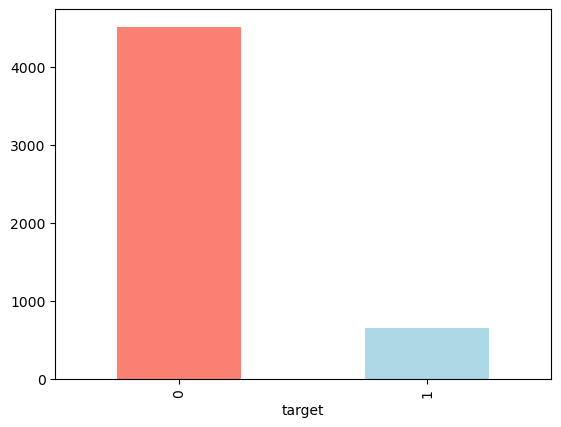

In [18]:
df['target'].value_counts().plot(kind='bar',color=['salmon','lightblue']);

In [23]:
df['num_characters'] = df['text'].apply(len)

C:\Users\dell\AppData\Local\Temp\ipykernel_11372\253964734.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_characters'] = df['text'].apply(len)


In [24]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [25]:
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

C:\Users\dell\AppData\Local\Temp\ipykernel_11372\76344806.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))


In [26]:
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

C:\Users\dell\AppData\Local\Temp\ipykernel_11372\4112269855.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))


In [27]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [28]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [29]:
# ham
df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [30]:
# spam
df[df['target'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [34]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
            
    return " ".join(y)

In [35]:
ps = PorterStemmer()
ps.stem('coding')

'code'

In [36]:
df['transformed_text'] = df['text'].apply(transform_text)

C:\Users\dell\AppData\Local\Temp\ipykernel_11372\283536690.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['transformed_text'] = df['text'].apply(transform_text)


In [37]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


## Modelling

In [43]:
np.random.seed(42)
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)
X = tfidf.fit_transform(df['transformed_text']).toarray()
Y = df['target'].values
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2)

In [44]:
# put models in a dictionary
models={"Naive Bayes":MultinomialNB(),
        "Logistic Regression":LogisticRegression()}
# create a function to fit and score data
def fit_and_score(models,X_train,X_test,Y_train,Y_test):
    """
    Fits and evaluate given ml models
    models:a dict of different sk learn ml models
    X_train:training data(no labels)
    X_test:testing data(no labels)
    Y_train:training labels
    Y_test:testing labels
    """
    #set random seeds
    np.random.seed(42)
    #loop through models
    for name, model in models.items():
        #fit the model to the data
        print(f"MODEL: {name}")
        model.fit(X_train,Y_train)
        Y_pred = model.predict(X_test)
        # Evaluation Metrics
        accuracy=accuracy_score(Y_test, Y_pred)
        precision=precision_score(Y_test, Y_pred)
        recall=recall_score(Y_test, Y_pred)
        f1=f1_score(Y_test, Y_pred)
        print(f"\n Accuracy: {accuracy}")
        print(f" Precision: {precision}")
        print(f" Recall: {recall}")
        print(f" F1 Score: {f1}")
        # Confusion Matrix
        print("\n Confusion Matrix:")
        print(confusion_matrix(Y_test, Y_pred))
        # Classification Report
        print("\n Classification Report:")
        print(classification_report(Y_test, Y_pred))

In [49]:
fit_and_score(models=models,X_train=X_train,X_test=X_test,Y_train=Y_train,Y_test=Y_test)

MODEL: Naive Bayes

 Accuracy: 0.9729206963249516
 Precision: 0.9915966386554622
 Recall: 0.8137931034482758
 F1 Score: 0.8939393939393939

 Confusion Matrix:
[[888   1]
 [ 27 118]]

 Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       889
           1       0.99      0.81      0.89       145

    accuracy                           0.97      1034
   macro avg       0.98      0.91      0.94      1034
weighted avg       0.97      0.97      0.97      1034

MODEL: Logistic Regression

 Accuracy: 0.9584139264990329
 Precision: 0.9473684210526315
 Recall: 0.7448275862068966
 F1 Score: 0.833976833976834

 Confusion Matrix:
[[883   6]
 [ 37 108]]

 Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       889
           1       0.95      0.74      0.83       145

    accuracy                           0.96      1034
   macro avg       0.95      0.87 

### Making predictions

In [52]:
model1=MultinomialNB()
model1.fit(X_train,Y_train)
model2=LogisticRegression()
model2.fit(X_train,Y_train)

LogisticRegression()

In [56]:
import pickle
with open('vectorizer.pkl', 'wb') as file:
    pickle.dump(tfidf, file)
with open('model1.pkl', 'wb') as file:
    pickle.dump(model1, file)
with open('model2.pkl', 'wb') as file:
    pickle.dump(model2, file)
print("Models pickled successfully.")

Models pickled successfully.
